In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit,execute, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
from qiskit import IBMQ
plt.style.use('seaborn')
# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

## The Quantum Random Number generator 

This notebook provides the most simple example of a quantum algorithm: a random number generator. 


In [2]:
IBMQ.load_account()
IBMQ.providers()

ibmqfactory.load_account:WARNING:2022-02-08 21:42:43,398: Credentials are already in use. The existing account in the session will be replaced.


[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

In [3]:
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()
backend = provider.get_backend('ibmq_bogota')
backend

<IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>

Generate 8 random number(s) in the range [1,10]
4 qubits will be required
Using matplotlib backend: Qt5Agg


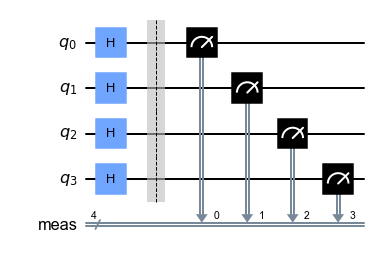

In [4]:

n = 10                         #Random integer maximum
numbers = 8
print("Generate {} random number(s) in the range [1,{}]".format(numbers,n))
nb = bin(n)                     #binary representation of n

nq = len(str(nb)) -2            #Number of qubits requierd

print("{} qubits will be required".format(nq))

qrng = QuantumCircuit(nq)       #Define our quantum circuit

for i in range(nq ):            #Place a Hadamard on each qubit
    qrng.h(i)

qrng.measure_all()              #Measure all Qubits
qrng.draw()

#Execute the quantum circuit and store the results
counts = execute(qrng,Aer.get_backend('qasm_simulator'),shots = 10000).result().get_counts() 
fig =  plot_histogram(counts) #Show results as historgram
%matplotlib
qrng.draw()

Using matplotlib backend: Qt5Agg


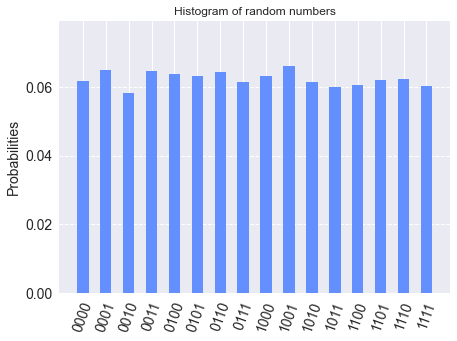

In [5]:
#%matplotlib inline
%matplotlib
legend = [i for i in range(16)]



plot_histogram(counts, title = 'Histogram of random numbers', bar_labels=False)

In [6]:
nr =[] #Store random numbers in a list

j = 0
while j < numbers:
    for i in counts: #Sample all the counts
    
        k = int(i,2)
        if k < n:
            nr.append(k)
            j = j+  1
            
print(nr)

[4, 2, 7, 9, 1, 0, 5, 6, 3, 8]


In [7]:
seed = np.random.randint(100,200)

print(seed)
r1 = seed**2
print(r1)


177
31329


In [8]:
print(nr)
print(type(nr[0]))

[4, 2, 7, 9, 1, 0, 5, 6, 3, 8]
<class 'int'>


In [9]:

n = 2020 
nb = bin(n)

print(nb)

nq = len(str(nb)) -2

print(nq)


0b11111100100
11


In [10]:
#Runnning on IBM Santiago

backend = provider.get_backend('ibmq_santiago')

n = 10                         #Random integer maximum
numbers = 8                     #Number of random numbers
nb = bin(n)                     #binary representation of n
nr =[]                          #Store random numbers in a list
nq = len(str(nb)) -2            #Number of qubits requierd

qrng = QuantumCircuit(nq)       #Define our quantum circuit#
for i in range(nq):            #Place a Hadamard on each qubit
    qrng.h(i)
qrng.measure_all()              #Measure all Qubits
#Execute the quantum circuit and store the results
counts = execute(qrng,backend,shots = 1000).result().get_counts() 

j = 0
while j < numbers:
    for i in counts: #Sample all the counts
    
        k = int(i,2)
        if k < n:
            nr.append(k)
            j = j+  1
            
plot_histogram(counts) #Show results as historgram
print(nr)

IBMQBackendApiError: "Error submitting job: '403 Client Error: Forbidden for url: https://api.quantum-computing.ibm.com/api/Network/ibm-q/Groups/open/Projects/main/Jobs. The queue is disabled., Error code: 3245.'"

In [ ]:
#Random Number generator

backend = Aer.get_backend('qasm_simulator')

nmax = 31                       #Random integer maximum
nr =[]                          #Store random numbers in a list
n = 8                           #Number of random numbers
nb = bin(nmax)                  #binary representation of n
nq = len(str(nb)) -2            #Number of qubits requierd

qrng = QuantumCircuit(nq)       #Define our quantum circuit
for i in range(nq ):            #Place a Hadamard on each qubit
    qrng.h(i)
qrng.measure_all()              #Measure all Qubits

#Execute the quantum circuit and store the results
counts = execute(qrng,backend,shots = 1000).result().get_counts() 

j = 0
while j < n:
    for i in counts:            #Sample all the counts
    
        k = int(i,2)            #convert from binary back to decimal
        if k < n :              #add to the list if they are less than nmax
            nr.append(k)
            j = j+  1
print(nr)

[5, 2, 6, 4, 1, 3, 0, 7]
